In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

%matplotlib inline

In [2]:
os.listdir()

['Battery-20180204-1525.csv',
 '.ipynb_checkpoints',
 'Humidity-20180204-1658.csv',
 'Temp-20180204-1705.csv',
 'Explore Huzzah Env Feed.ipynb']

In [3]:
df = pd.read_csv('Battery-20180204-1525.csv')

In [4]:
df.head()

,id,value,feed_id,created_at,lat,lon,ele
0,0DSHS0CP2NEFY90XBMP1TD5SF9,16,756684,2018-01-28 21:09:10 UTC,0.0,0.0,0.0
1,0DSHS0NWZGX1PZDET595NHRQAF,17,756684,2018-01-28 21:09:40 UTC,0.0,0.0,0.0
2,0DSHS0Z97N4GES5YTZXE4G7R1R,16,756684,2018-01-28 21:10:11 UTC,0.0,0.0,0.0
3,0DSHS18G7T0Z37X095FSMAD3V7,12,756684,2018-01-28 21:10:41 UTC,0.0,0.0,0.0
4,0DSHS1HWHV41ZSYE1T0VZ57BZ3,17,756684,2018-01-28 21:11:12 UTC,0.0,0.0,0.0


In [5]:
type(df['created_at'][0])

str

In [6]:
df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d %H:%M:%S %Z')

In [7]:
type(df['created_at'][0])

pandas._libs.tslib.Timestamp

In [8]:
df.head()

,id,value,feed_id,created_at,lat,lon,ele
0,0DSHS0CP2NEFY90XBMP1TD5SF9,16,756684,2018-01-28 21:09:10,0.0,0.0,0.0
1,0DSHS0NWZGX1PZDET595NHRQAF,17,756684,2018-01-28 21:09:40,0.0,0.0,0.0
2,0DSHS0Z97N4GES5YTZXE4G7R1R,16,756684,2018-01-28 21:10:11,0.0,0.0,0.0
3,0DSHS18G7T0Z37X095FSMAD3V7,12,756684,2018-01-28 21:10:41,0.0,0.0,0.0
4,0DSHS1HWHV41ZSYE1T0VZ57BZ3,17,756684,2018-01-28 21:11:12,0.0,0.0,0.0


In [9]:
df.drop(['id', 'feed_id', 'lat', 'lon', 'ele'], axis=1, inplace=True) 

In [10]:
df.head()

,value,created_at
0,16,2018-01-28 21:09:10
1,17,2018-01-28 21:09:40
2,16,2018-01-28 21:10:11
3,12,2018-01-28 21:10:41
4,17,2018-01-28 21:11:12


In [11]:
df = df.set_index('created_at')
df.head()

,value
created_at,
2018-01-28 21:09:10,16
2018-01-28 21:09:40,17
2018-01-28 21:10:11,16
2018-01-28 21:10:41,12
2018-01-28 21:11:12,17


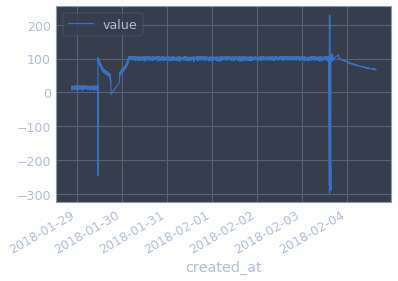

In [12]:
df.plot()

In [13]:
df.describe()

,value
count,16979.000000
mean,86.627245
std,36.640393
min,-298.000000
25%,96.000000
50%,100.000000
75%,102.000000
max,228.000000


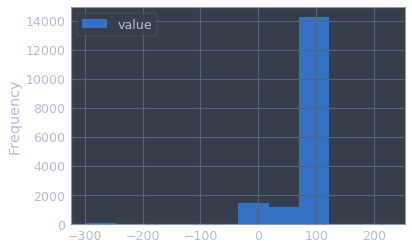

In [14]:
df.plot.hist(bins=10)

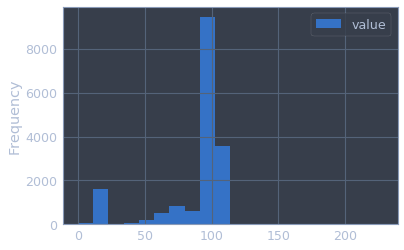

In [15]:
df2 = df
df2 = df2.drop(df2[df2.value < 0].index)
df2.plot.hist(bins=20)

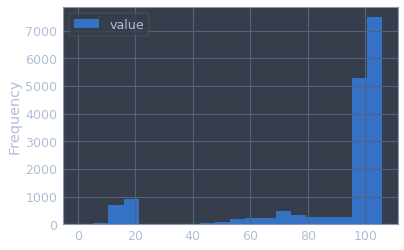

In [16]:
df2 = df2.drop(df2[df2.value > 110].index)
df2.plot.hist(bins=20)

In [17]:
df2.describe()

,value
count,16865.000000
mean,88.442870
std,26.674859
min,0.000000
25%,97.000000
50%,100.000000
75%,102.000000
max,106.000000


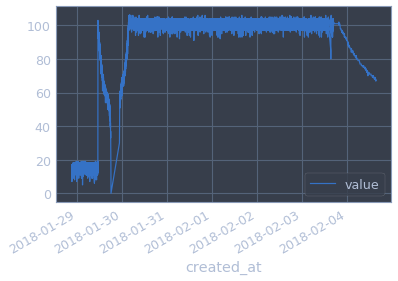

In [18]:
df2.plot()

In [19]:
df3 = df
df3[df3.value < 0] = 0
df3[df3.value > 110] = 110
df3.describe()

,value
count,16979.000000
mean,87.978621
std,27.393615
min,0.000000
25%,96.000000
50%,100.000000
75%,102.000000
max,110.000000


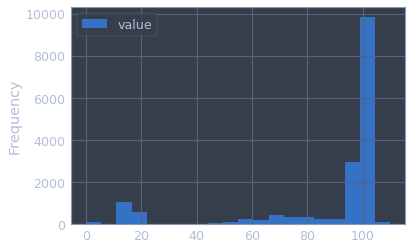

In [20]:
df3.plot.hist(bins=20)

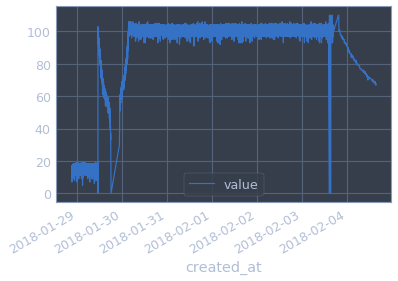

In [21]:
df3.plot()

In [22]:
batt = df
batt.head()

,value
created_at,
2018-01-28 21:09:10,16
2018-01-28 21:09:40,17
2018-01-28 21:10:11,16
2018-01-28 21:10:41,12
2018-01-28 21:11:12,17


In [23]:
temp = pd.read_csv('Temp-20180204-1705.csv')
humi = pd.read_csv('Humidity-20180204-1658.csv')

In [24]:
temp.drop(['id', 'feed_id', 'lat', 'lon', 'ele'], axis=1, inplace=True) 
humi.drop(['id', 'feed_id', 'lat', 'lon', 'ele'], axis=1, inplace=True) 

In [25]:
temp['created_at'] = pd.to_datetime(temp['created_at'], format='%Y-%m-%d %H:%M:%S %Z')
humi['created_at'] = pd.to_datetime(humi['created_at'], format='%Y-%m-%d %H:%M:%S %Z')

In [26]:
temp.set_index('created_at', inplace=True)
humi.set_index('created_at', inplace=True)

In [27]:
batt.rename(columns={'value':'battery_percent'}, inplace=True)
humi.rename(columns={'value':'relative_humidity'}, inplace=True)
temp.rename(columns={'value':'temp_in_f'}, inplace=True)

In [28]:
envm = batt.join(humi).join(temp)

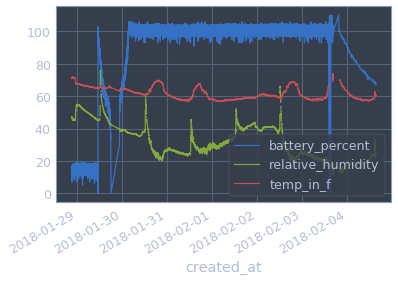

In [29]:
envm.plot()

In [30]:
envm.head()

,battery_percent,relative_humidity,temp_in_f
created_at,,,
2018-01-28 21:09:10,16,47.348541,70.914246
2018-01-28 21:09:40,17,NaN,NaN
2018-01-28 21:10:11,16,47.134918,70.779114
2018-01-28 21:10:41,12,NaN,NaN
2018-01-28 21:11:12,17,47.188324,70.894936


In [31]:
!jt -t onedork